## Notebook only contains small code snippets and function calls. All code is in py files in repo.

In [24]:
from Processing import *
from ImageHandler import *
from ImageProcessing import *
from GeometryProcessing import *

import globalVar
rcParams['figure.figsize'] = 14, 28

### Notice the Hough Lines detected contains many diagonal lines.

Found 19 components with height 17.94736842105263 in image


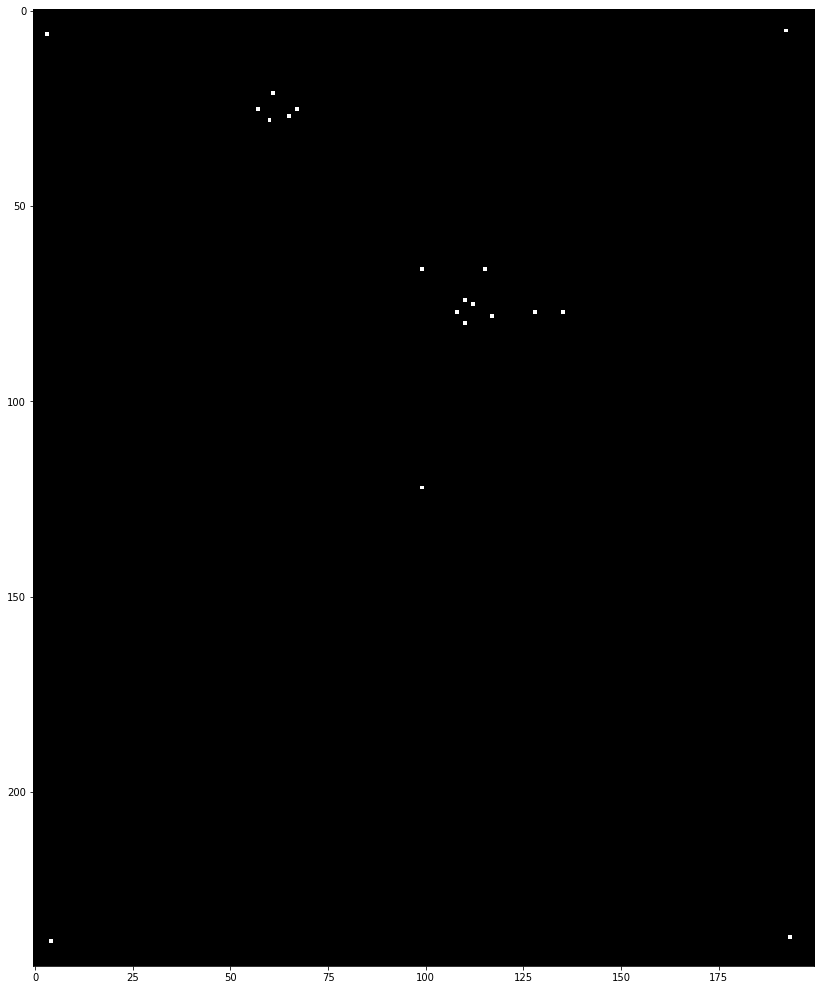

Calculated 51 lines


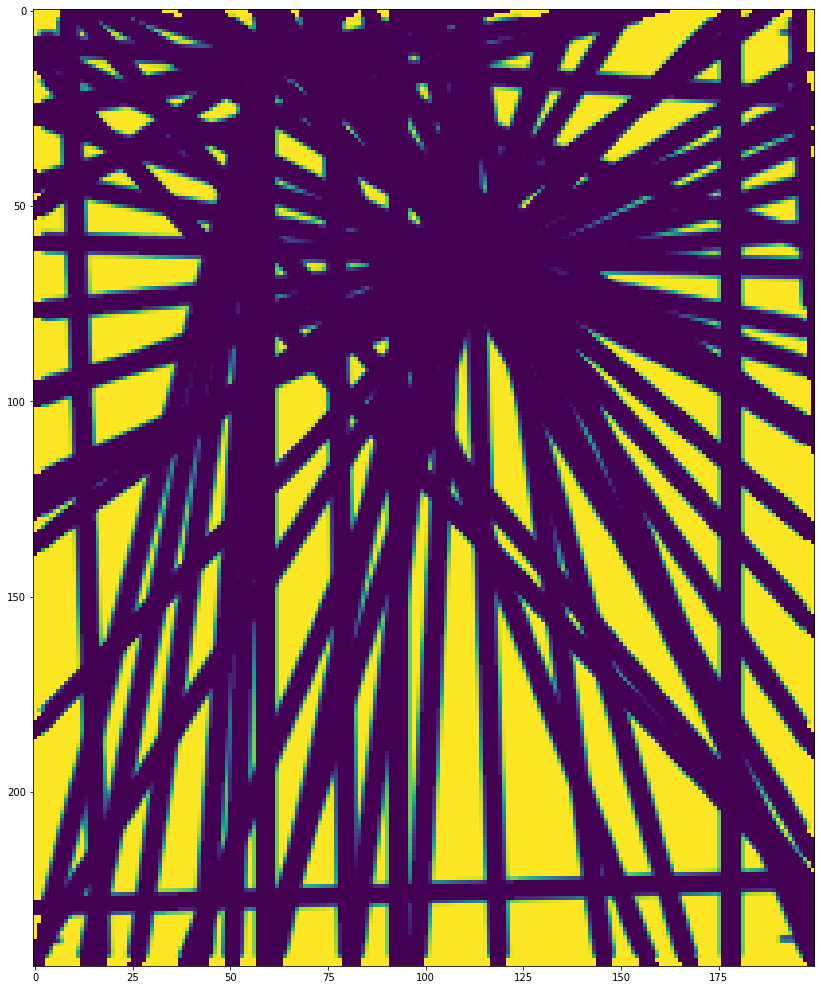

In [27]:
image = loadImage("../Test-data/222-small.jpg");
labels, avg_height, centroids, DemoImg, stats = findComponents(image);
linesO = findHoughLines(DemoImg, image, avg_height, 8, 5, 5);

## Below are the components that are generated from opencv. It has some very large component and some very small ones. Paper has nothing to filter these out. These causes spike in external neighbour counts.

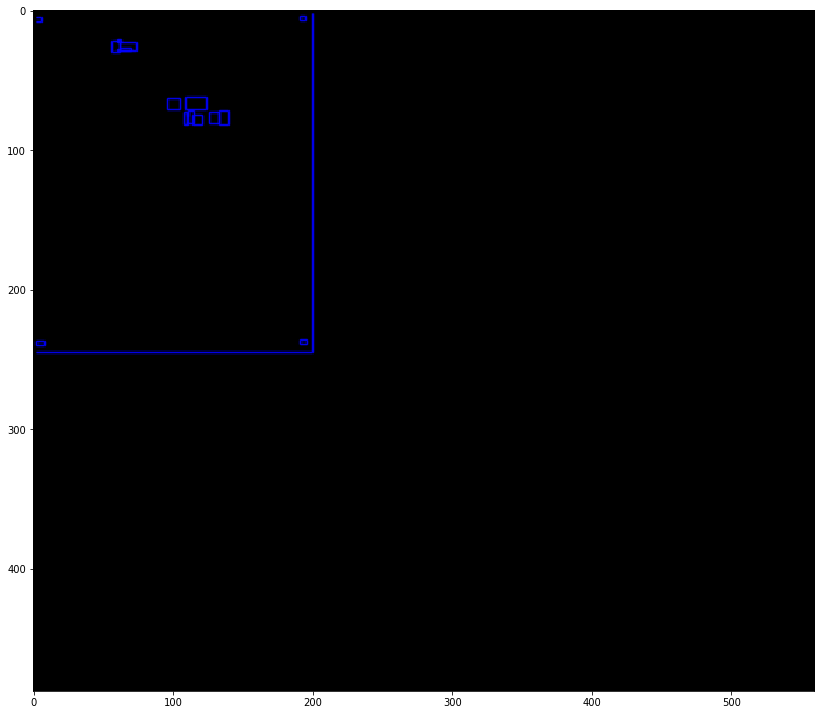

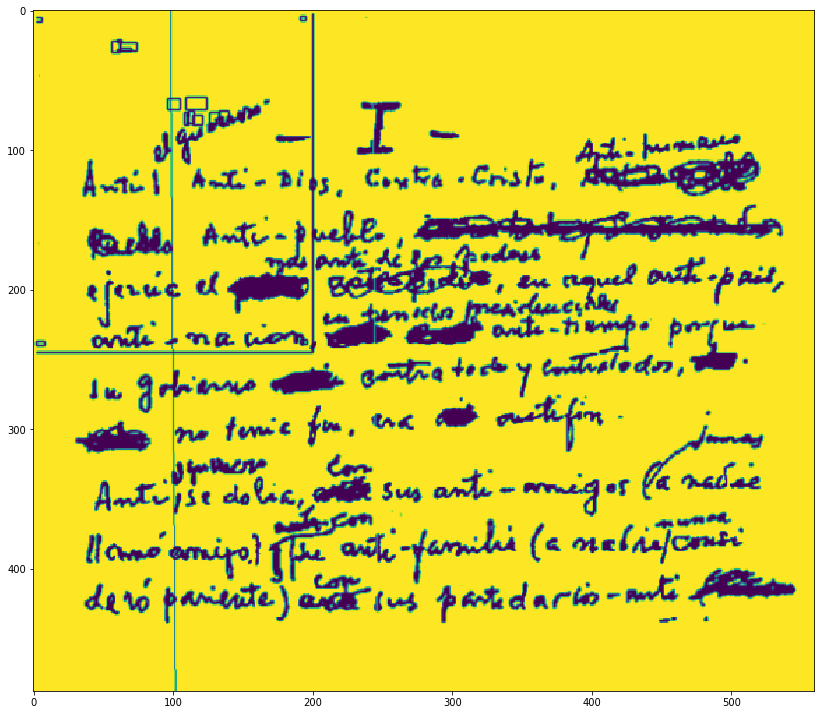

In [28]:
image = loadImage("../Test-data/test.png");
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);

for stat in stats:
    pt1 = (stat[0]          , stat[1]          )
    pt2 = (stat[0] + stat[2], stat[1]          )
    pt3 = (stat[0] + stat[2], stat[1] + stat[3])
    pt4 = (stat[0]          , stat[1] + stat[3])
    cv.line(image, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt2, pt3, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt3, pt4, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt4, pt1, (0,0,255), 1, cv.LINE_AA)
    cv.line(DemoImg, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
    cv.line(DemoImg, pt2, pt3, (0,0,255), 1, cv.LINE_AA)
    cv.line(DemoImg, pt3, pt4, (0,0,255), 1, cv.LINE_AA)
    cv.line(DemoImg, pt4, pt1, (0,0,255), 1, cv.LINE_AA)
plt.imshow(DemoImg);
plt.show()
plt.imshow(image);

In [29]:
lines = np.copy(linesO);
leftLines = len(lines);
selLines = [];

globalVar.init(lines, centroids);

51 Lines left, 2 Lines in this cluster, Value of primary cell 6, Chosen Line (-25.5, 2.268928)
49 Lines left, 5 Lines in this cluster, Value of primary cell 6, Chosen Line (127.5, 0.296705961227417)
44 Lines left, 5 Lines in this cluster, Value of primary cell 6, Chosen Line (-110.5, 3.1066861152648926)
39 Lines left, 2 Lines in this cluster, Value of primary cell 5, Chosen Line (-8.5, 2.1118483543395996)
37 Lines left, 3 Lines in this cluster, Value of primary cell 4, Chosen Line (8.5, 2.0245819091796875)
34 Lines left, 11 Lines in this cluster, Value of primary cell 4, Chosen Line (127.5, 0.5585053563117981)
23 Lines left, 3 Lines in this cluster, Value of primary cell 4, Chosen Line (42.5, 1.2915436029434204)
20 Lines left, 7 Lines in this cluster, Value of primary cell 3, Chosen Line (59.5, 0.24434609711170197)
13 Lines left, 1 Lines in this cluster, Value of primary cell 2, Chosen Line (-42.5, 2.4085543155670166)
12 Lines left, 1 Lines in this cluster, Value of primary cell 2, Cho

TypeError: cannot unpack non-iterable int object

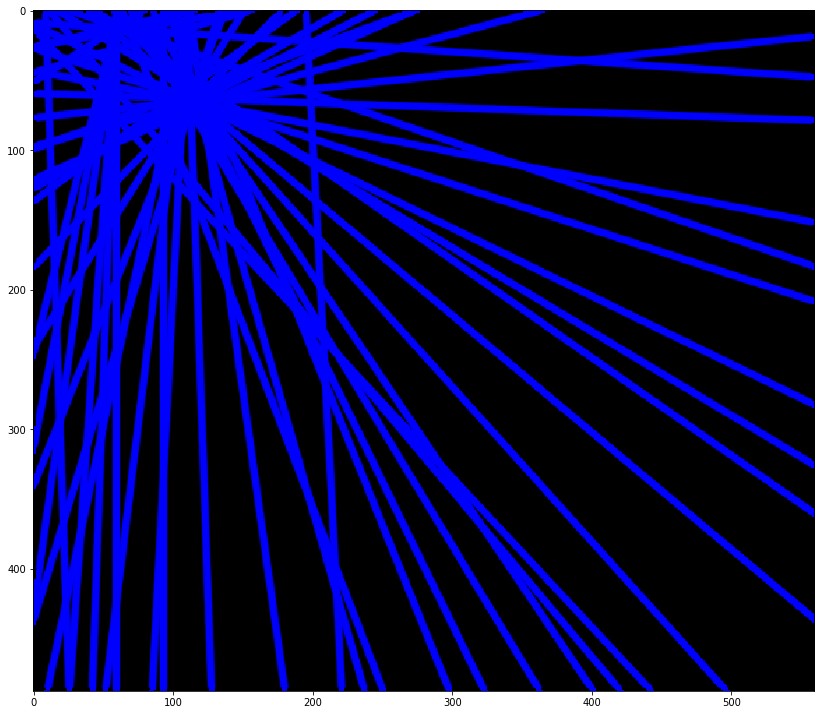

In [30]:
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);
vertices = [];

while (True):
    if (leftLines < 1):
        break
    print (str(leftLines) + " Lines left", end = ", ");
    (rho_, theta_), pos_ = findPrimaryCell(lines, centroids)

    f_clus = findClustersize(theta_, avg_height)

    x0 = rho_ - f_clus
    x1 = rho_ + f_clus
    z0 = theta_ - math.radians(3)
    z1 = theta_ + math.radians(3)

    clusCells, clusPos, lines, stop, vertix = findcells(x0, x1, z0, z1, lines);
    vertices.append(vertix);
    leftLines = leftLines - len(clusCells);

    if (stop):
        break;
    print (str (len(clusCells)) + " Lines in this cluster", end = ", ");
    showLines(clusCells, DemoImg)
    n0 = findValueofcell([(rho_, theta_)], centroids, pos_)
    print ("Value of primary cell " + str(n0), end = ", ");

    ntemp = 0
    rho1, theta1 = 0,0
    lpos1 = 0;
    for pos in range(len(clusCells)):
        i = clusCells[pos];
        if (i[0][0] == rho_ and i[0][1] == theta_):
            continue
        temp = findValueofcell(i, centroids, pos)
        if (temp > ntemp):
            ntemp = temp
            rho1 = i[0][0]
            theta1 = i[0][1]
            lpos1 = clusPos[pos];

    (rhon, thetan) , pos = compareValueinStruct([(rho_, theta_)], pos_, [(rho1, theta1)], lpos1, centroids, x0, x1, z0, z1, n0, ntemp)

    print ("Chosen Line " + str((rhon, thetan)));
    selLines.append((rhon, thetan));

#### Ignore above image. It is overwritten.

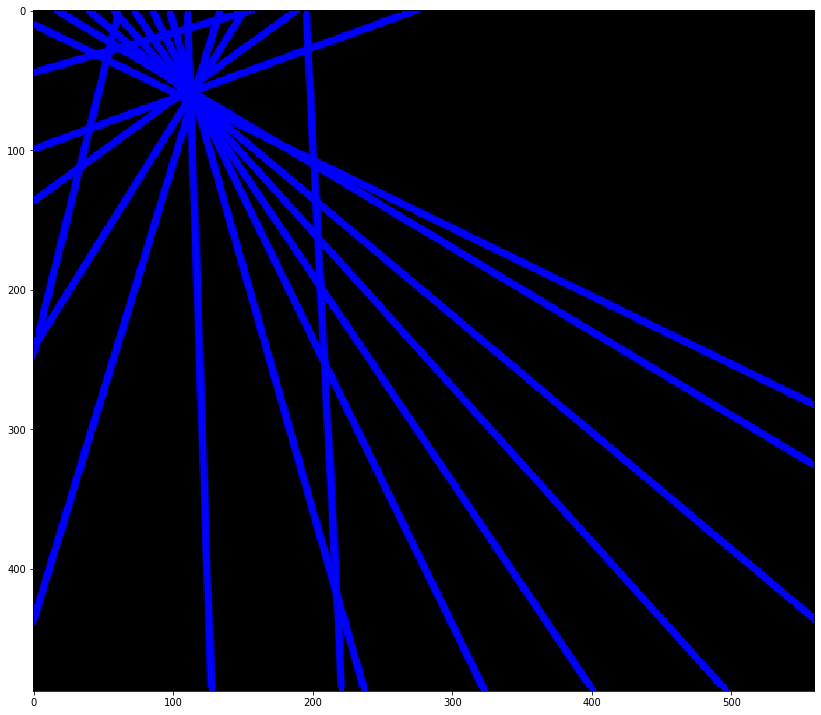

In [31]:
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);
for line in selLines:
    rho = line[0]
    theta = line[1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(DemoImg, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
plt.imshow(DemoImg);

### Above lines are chosen after applying fliteration using cluster as described in paper. It filters out many horizontal and chooses diagonal ones instead. This is caused because of the cluster that are being chosen (shown below) because of diagonal hough lines . 

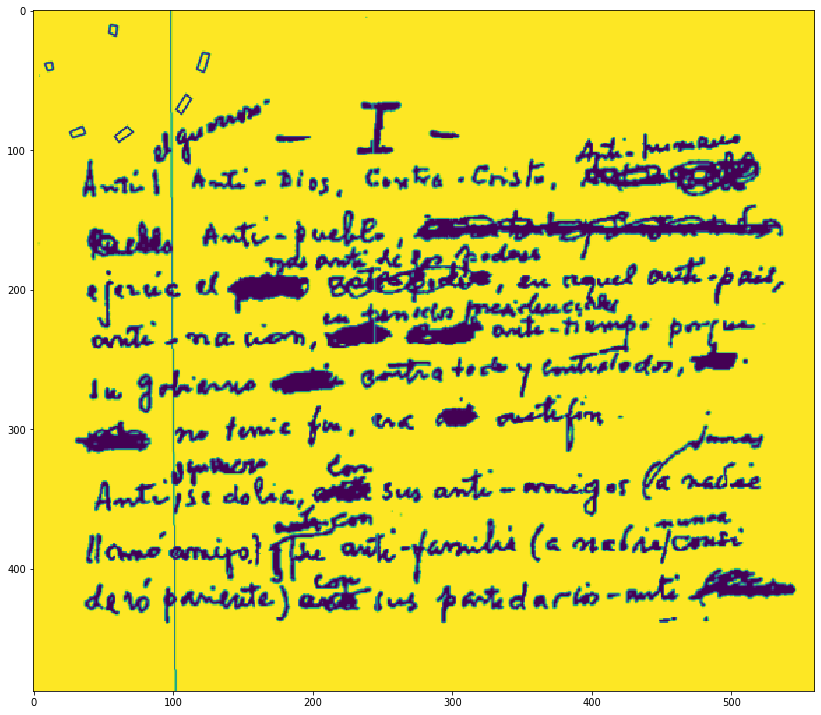

In [32]:
image = loadImage("../Test-data/test.png");
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);

for vertix in vertices:
    vertix = [(int (v[0]),int (v[1])) for v in vertix];
    pt1 = vertix[0]
    pt2 = vertix[1]
    pt3 = vertix[3]
    pt4 = vertix[2]
    cv.line(image, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt2, pt3, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt3, pt4, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt4, pt1, (0,0,255), 1, cv.LINE_AA)
plt.imshow(image);

In [33]:
data = [];
lineData = [];
remove = 0;

for i in range(len(selLines)):
    print ("Working for line " + str(i + 1) + " of " + str(len(selLines)), end = '\r');
    line = selLines[i];
    x1, x2, y1, y2 = findLine(line[0], line[1])
    lineF = Line((x1,y1),(x2,y2));
    labelDataCont = [];
    labelDataNCont = [];
    for i in range(len(stats)):
        stat = stats[i];
        if (stat[4] > 350 or stat[4] < 20):
            remove += 1;
            continue;
        centroid = centroids[i];
        
        x1, y1 = (int (stat[0]          ), int (stat[1]          ))
        x2, y2 = (int (stat[0] + stat[2]), int (stat[1]          ))
        x3, y3 = (int (stat[0] + stat[2]), int (stat[1] + stat[3]))
        x4, y4 = (int (stat[0]          ), int (stat[1] + stat[3]))

        segment1 = Segment((x1, y1), (x2, y2));
        segment2 = Segment((x2, y2), (x3, y3));
        segment3 = Segment((x3, y3), (x4, y4));
        segment4 = Segment((x4, y4), (x1, y1));

        i1 = lineF.intersection(segment1)
        i2 = lineF.intersection(segment2)
        i3 = lineF.intersection(segment3)
        i4 = lineF.intersection(segment4)

        # Only put if line intersects this component
        if (not (len(i1) == 0 and len(i2) == 0 and len(i3) == 0 and len(i4) == 0)):
            labelDataCont.append([[stat],[centroid],[i1,i2,i3,i4]]);
        else:
            labelDataNCont.append([[stat], [centroid]]);

    lineData.append([labelDataCont,labelDataNCont]);
data.append(lineData);

In [34]:
backupData = data.copy()

In [35]:
validLines = [];
for k in range(len(data[0])):
    line = data[0][k];
    line[0] = sort (line[0]);
    if len(line[0]) > 2 :
        intNeigh = (len(line[0]) - 2) * 2 + 2;
    else:
        intNeigh = len(line[0]);
    extNeigh = 0;
    for i in range(1, len(line[0]) - 1):
        comp = line[0][i];
        extDistance = extDist(line[0], i);
        
        print ("External Distance : " + str(int(extDistance)), end = '\r');

        for j in range(len(line[1])):
            stat = line[1][j];
            if (stat == []):
                continue;
            dist = findDistanceBWcomp(comp[1][0], stat[1][0]);

            if (dist < extDistance):
                extNeigh += 1;
                line[1][j] = [];
    print ("External neighbour : " + str(extNeigh) + " Internal neighbour: " + str(intNeigh))
    if (extNeigh > intNeigh):
        validLines.append([selLines[k]]);


External neighbour : 1 Internal neighbour: 6
External neighbour : 0 Internal neighbour: 1
External neighbour : 0 Internal neighbour: 1
External neighbour : 2 Internal neighbour: 4
External neighbour : 0 Internal neighbour: 4
External neighbour : 0 Internal neighbour: 1
External neighbour : 0 Internal neighbour: 1
External neighbour : 0 Internal neighbour: 0
External neighbour : 0 Internal neighbour: 2
External neighbour : 0 Internal neighbour: 1
External neighbour : 0 Internal neighbour: 2
External neighbour : 0 Internal neighbour: 1
External neighbour : 0 Internal neighbour: 1
External neighbour : 0 Internal neighbour: 1
External neighbour : 0 Internal neighbour: 0


### Notice that many ext neighbour are less than int neighbour, hence causing validation of lines. But the lines validated are all diagonal ones(shown below).

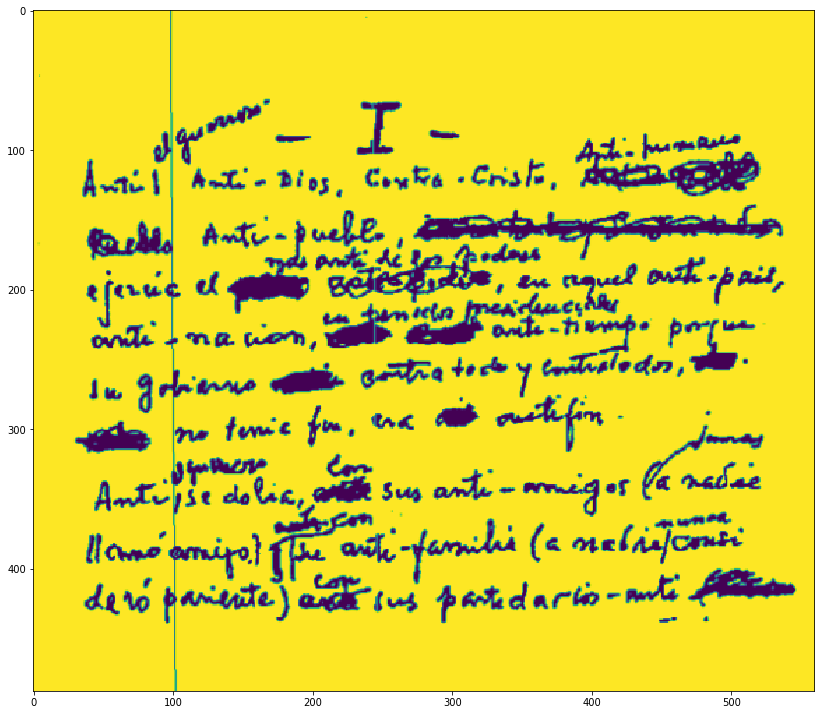

In [36]:
image = loadImage("../Test-data/test.png");
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);

showLines(validLines, image);

In [77]:
data

[]

In [252]:
selLines[0]

(120.0, 1.5707964)

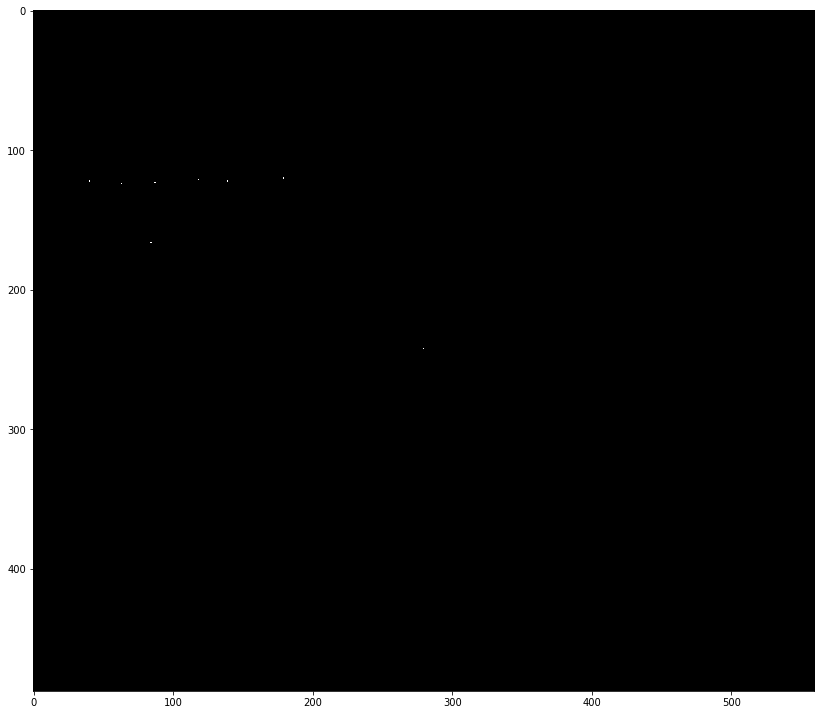

In [47]:
DemoImg[int(data[0][0][0][0][1][0][1]), int(data[0][0][0][0][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][1][1][0][1]), int(data[0][0][0][1][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][2][1][0][1]), int(data[0][0][0][2][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][3][1][0][1]), int(data[0][0][0][3][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][4][1][0][1]), int(data[0][0][0][4][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][5][1][0][1]), int(data[0][0][0][5][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][6][1][0][1]), int(data[0][0][0][6][1][0][0])] = [255,255,255]
DemoImg[int(data[0][0][0][7][1][0][1]), int(data[0][0][0][7][1][0][0])] = [255,255,255]
plt.imshow(DemoImg)
plt.show()

In [55]:
data[0][0][0][6]

[[array([126, 115,  26,  14,  97], dtype=int32)],
 [array([139.20618557, 122.49484536])],
 [[Point2D(126, 239007/1999)],
  [Point2D(1004994/7003, 837363/7003)],
  [Point2D(152, 239033/1999)],
  [Point2D(940033/6990, 835777/6990)]]]

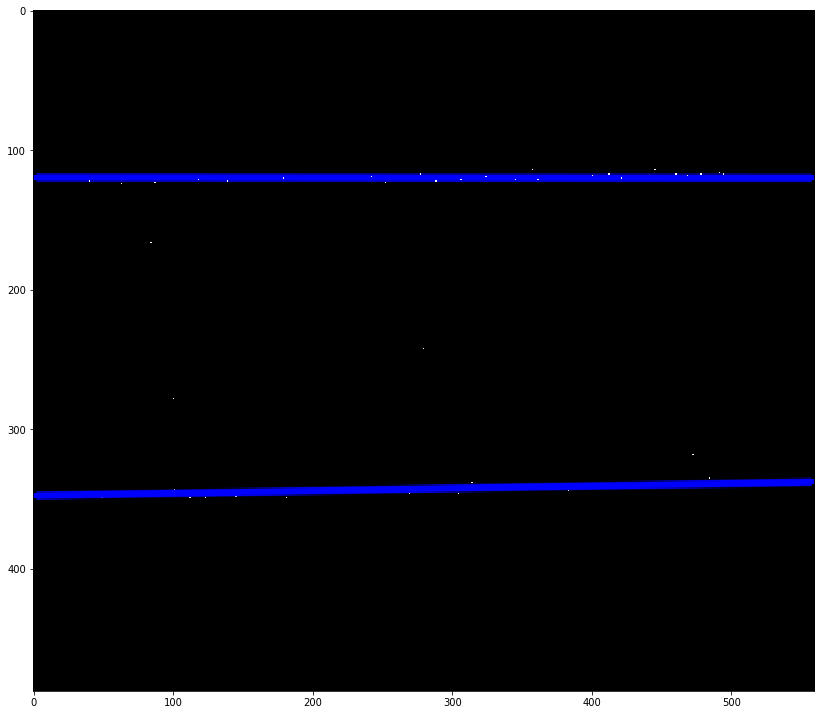

In [39]:
showLines([[selLines[4]]], DemoImg)

In [81]:
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)

DemoImg = np.zeros_like(edgyColor);


In [6]:
rcParams['figure.figsize'] = 14, 28

In [38]:
selLines[4]

(348.0, 1.5533430576324463)

In [61]:
area = 0;
for stat in stats:
    area += stat[4]

In [63]:
area/387

706.1498708010336

In [65]:
## write code for which components to consider and which not to.

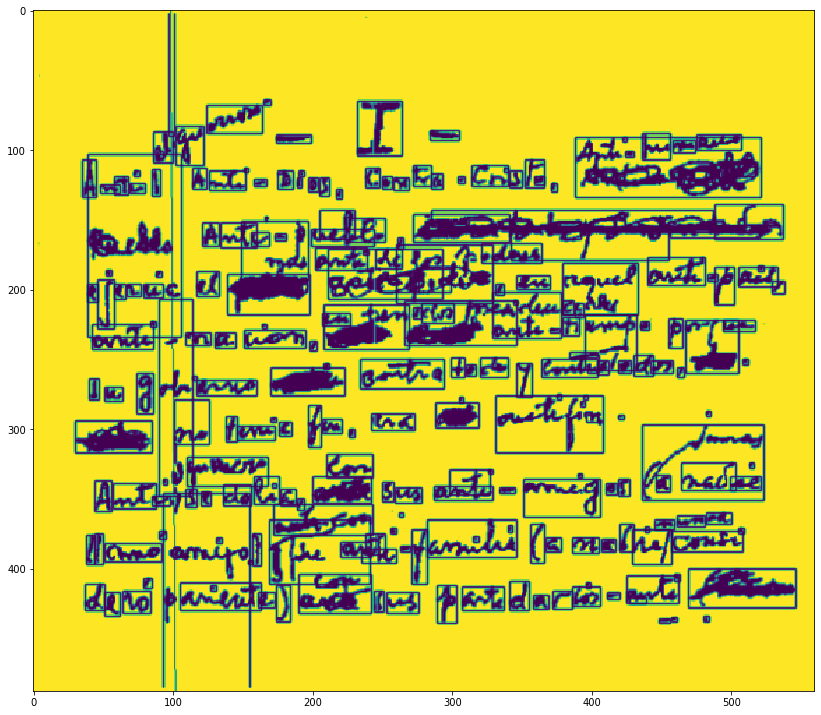

In [9]:
image = loadImage("../Test-data/test.png");
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);

for stat in stats:
    pt1 = (stat[0]          , stat[1]          )
    pt2 = (stat[0] + stat[2], stat[1]          )
    pt3 = (stat[0] + stat[2], stat[1] + stat[3])
    pt4 = (stat[0]          , stat[1] + stat[3])
    cv.line(image, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt2, pt3, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt3, pt4, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt4, pt1, (0,0,255), 1, cv.LINE_AA)
plt.imshow(image);

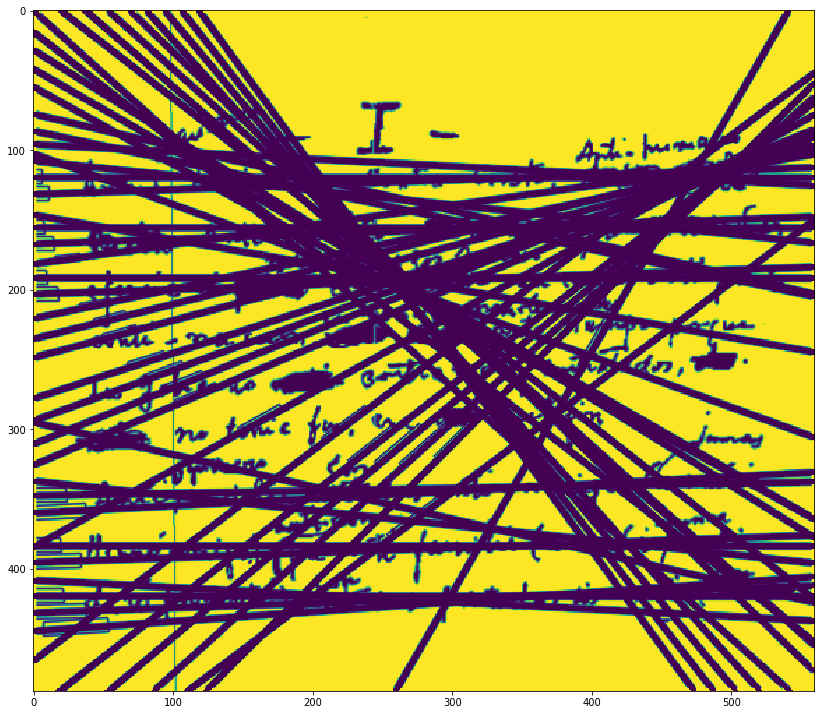

In [8]:
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);
for line in selLines:
    rho = line[0]
    theta = line[1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(image, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
plt.imshow(image);

In [5]:
vertices

[[(6.019, 114.842), (-6.019, 114.842), (6.542, 124.829), (-6.542, 124.829)],
 [(14.206, 162.38), (-2.845, 162.975), (15.078, 172.342), (-3.019, 172.974)],
 [(11.069, 126.517), (-2.216, 126.981), (11.94, 136.479), (-2.391, 136.979)],
 [(7.903, 150.793), (-7.903, 150.793), (8.426, 160.779), (-8.426, 160.779)],
 [(23.926, 342.164), (-11.971, 342.791), (24.624, 352.14), (-12.32, 352.785)],
 [(21.719, 414.431),
  (-21.719, 414.431),
  (22.243, 424.418),
  (-22.243, 424.418)],
 [(17.344, 198.243), (-3.473, 198.97), (18.216, 208.205), (-3.648, 208.968)],
 [(37.216, 425.375), (-7.452, 426.935), (38.087, 435.337), (-7.627, 436.933)]]

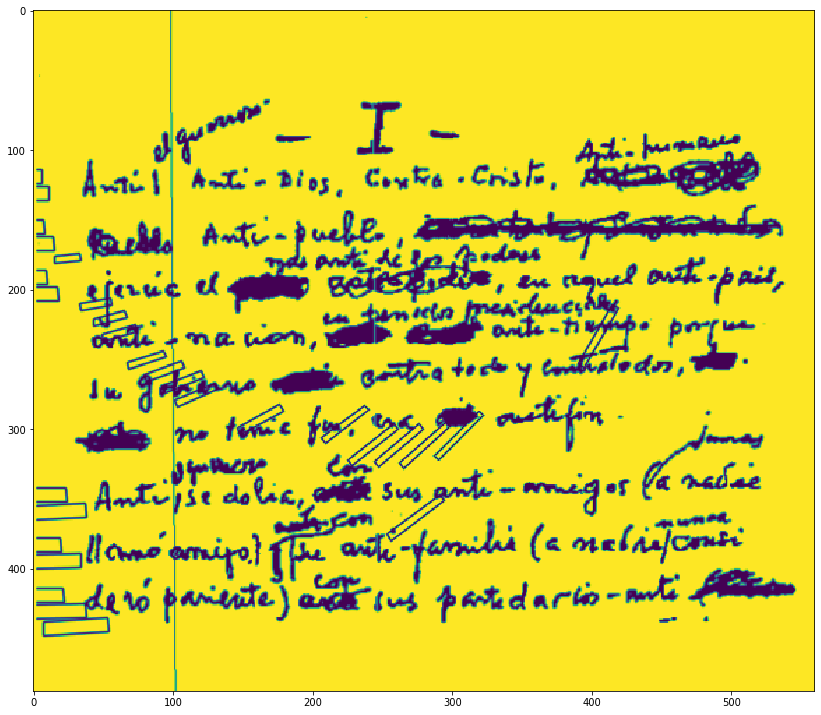

In [7]:
image = loadImage("../Test-data/test.png");
edgyImg = cv.Canny(image, 50, 200, None, 3)
edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)
DemoImg = np.zeros_like(edgyColor);

for vertix in vertices:
    vertix = [(int (v[0]),int (v[1])) for v in vertix];
    pt1 = vertix[0]
    pt2 = vertix[1]
    pt3 = vertix[3]
    pt4 = vertix[2]
    cv.line(image, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt2, pt3, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt3, pt4, (0,0,255), 1, cv.LINE_AA)
    cv.line(image, pt4, pt1, (0,0,255), 1, cv.LINE_AA)
plt.imshow(image);

In [19]:
def findDistanceBWcomphere(comp1, comp2, stat1, stat2):
    point1 = Point (int (comp1[0]), int (comp1[1]))
    point2 = Point (int (comp2[0]), int (comp2[1]))
    lineF = Line(point1, point2)
    
    pt1 = (int (stat1[0]           ), int (stat1[1]           ))
    pt2 = (int (stat1[0] + stat1[2]), int (stat1[1]           ))
    pt3 = (int (stat1[0] + stat1[2]), int (stat1[1] + stat1[3]))
    pt4 = (int (stat1[0]           ), int (stat1[1] + stat1[3]))

    segment11 = Segment(pt1, pt2);
    segment12 = Segment(pt2, pt3);
    segment13 = Segment(pt3, pt4);
    segment14 = Segment(pt4, pt1);
    
    pt1 = (int (stat2[0]           ), int (stat2[1]           ))
    pt2 = (int (stat2[0] + stat2[2]), int (stat2[1]           ))
    pt3 = (int (stat2[0] + stat2[2]), int (stat2[1] + stat2[3]))
    pt4 = (int (stat2[0]           ), int (stat2[1] + stat2[3]))

    segment21 = Segment(pt1, pt2);
    segment22 = Segment(pt2, pt3);
    segment23 = Segment(pt3, pt4);
    segment24 = Segment(pt4, pt1); 
    
    i1 = [lineF.intersection(segment11), lineF.intersection(segment12), lineF.intersection(segment13), lineF.intersection(segment14)]
    i2 = [lineF.intersection(segment21), lineF.intersection(segment22), lineF.intersection(segment23), lineF.intersection(segment24)]

    smallest = 9999999;
    
    for i in i1:
        if (len(i) == 0):
            continue;
        for j in i2:
            if (len(j) == 0):
                continue;
            e2eDist = i[0].distance(j[0]);
            if (e2eDist < smallest):
                smallest = e2eDist;
    
    return int (smallest);

In [22]:
def findComponents(image):
    edgyImg = cv.Canny(image, 50, 200, None, 3)
    edgyColor = cv.cvtColor(edgyImg, cv.COLOR_GRAY2BGR)

    DemoImg = np.zeros_like(edgyColor);

    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(edgyImg);
    avg_height = 0;
    for stat in stats:
        avg_height += stat[cv.CC_STAT_HEIGHT]
    avg_height /= num_labels
    print ("Found " + str(num_labels) + " components with height " + str(avg_height) + " in image")

    if centroids is not None:
        for centroid in centroids:
            DemoImg[int(centroid[1]), int(centroid[0])] = [255,255,255]

    plt.imshow(DemoImg)
    plt.show()

    return (labels, avg_height, centroids, DemoImg, stats)

In [37]:
len(validLines)

0